# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd

# Carregando arquivo
file_path = '/home/adrianoarchlinux/Downloads/demo01.csv'
data = pd.read_csv(file_path)
data.head()


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Verificar se há valores faltantes
missing_values = data.isnull().sum()

# Aplicar one-hot encoding às variáveis categóricas
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
encoder = OneHotEncoder(drop='first')  # Evitar a armadilha das variáveis dummy
encoded_features = encoder.fit_transform(data[categorical_columns])
encoded_features = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Reinicializar os índices para facilitar a concatenação
data.reset_index(drop=True, inplace=True)
encoded_features.reset_index(drop=True, inplace=True)

# Concatenar os recursos codificados de volta ao dataframe original
data_encoded = pd.concat([data.drop(categorical_columns + ['mau'], axis=1), encoded_features, data['mau']], axis=1)

# Dividir o dataset em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(
    data_encoded.drop('mau', axis=1), 
    data_encoded['mau'], 
    test_size=0.3, 
    random_state=42
)

print("Dados prontos para treino e validação!")
print(f"Conjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Conjunto de validação: {X_val.shape[0]} amostras")



Dados prontos para treino e validação!
Conjunto de treinamento: 11655 amostras
Conjunto de validação: 4995 amostras


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

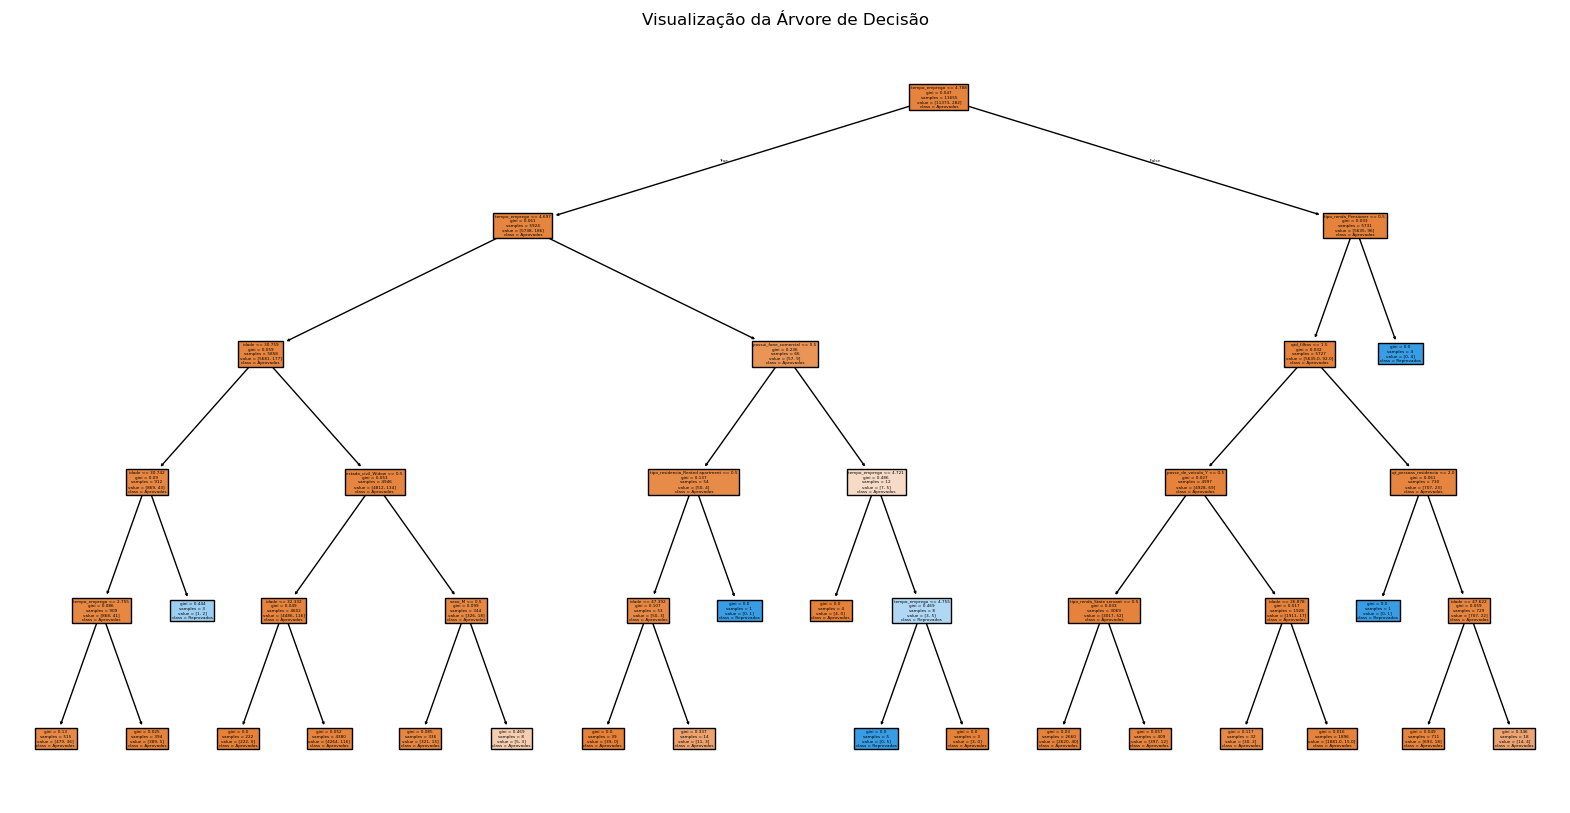

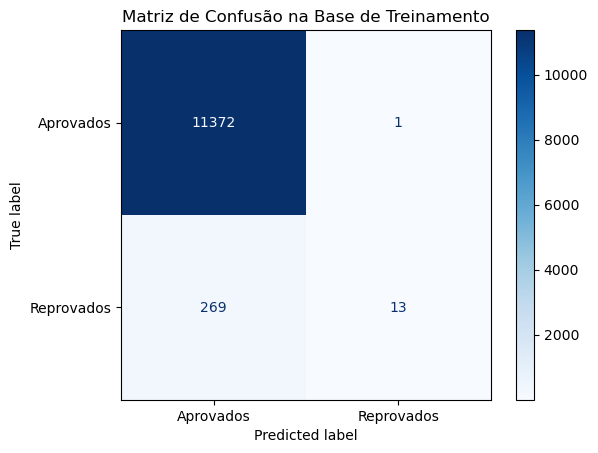

Acurácia na base de treinamento: 0.98


In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# 1. Definir o modelo de árvore de decisão
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Treinar o modelo
dt_model.fit(X_train, y_train)

# 3. Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Aprovados', 'Reprovados'])
plt.title('Visualização da Árvore de Decisão')
plt.show()

# 4. Produzir a visualização da matriz de confusão
y_pred_train = dt_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão na Base de Treinamento')
plt.show()

# 5. Calcular a acurácia na base de treinamento
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {accuracy:.2f}')




#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

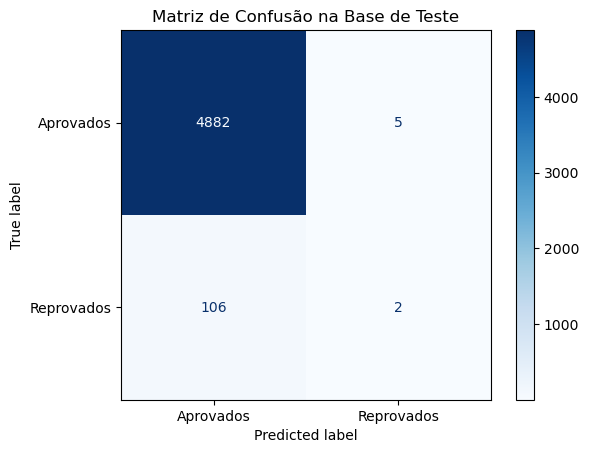

Acurácia na base de teste: 0.98
Diferença de acurácia: -0.00


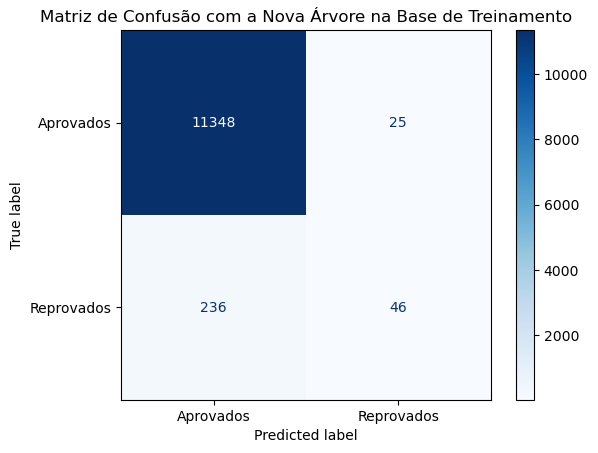

Proporção de proponentes classificados como "maus": 0.00%
Acurácia classificando todos como "bons": 0.00


In [7]:
# Avaliação na base de teste
y_pred_val = dt_model.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['Aprovados', 'Reprovados'])
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão na Base de Teste')
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Acurácia na base de teste: {accuracy_val:.2f}')

# Comparando com a acurácia de treinamento
print(f'Diferença de acurácia: {accuracy - accuracy_val:.2f}')

# Treinando uma nova árvore de decisão
dt_model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
dt_model_new.fit(X_train, y_train)

# Avaliação da nova árvore
y_pred_train_new = dt_model_new.predict(X_train)
cm_train_new = confusion_matrix(y_train, y_pred_train_new)
disp_train_new = ConfusionMatrixDisplay(confusion_matrix=cm_train_new, display_labels=['Aprovados', 'Reprovados'])
disp_train_new.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão com a Nova Árvore na Base de Treinamento')
plt.show()

# Proporção de proponentes classificados como 'maus'
proportion_maus = (y_pred_train_new == 'Reprovados').mean()
print(f'Proporção de proponentes classificados como "maus": {proportion_maus:.2%}')

# Acurácia classificando todos como 'bons'
all_good_accuracy = accuracy_score(y_train, ['Aprovados']*len(y_train))
print(f'Acurácia classificando todos como "bons": {all_good_accuracy:.2f}')

